# 1 часть

In [1]:
import numpy as np
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

# 1.3

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1) Разбиение датасета на тренировочную, валидационную и тестовую выборки

In [4]:
train_validation, test = train_test_split(df, test_size=0.3)
train, validation = train_test_split(train_validation, test_size = 0.5)

2) преобразование категориального признака ocean_proximity через кодировку Dummy

In [5]:
train = pd.get_dummies(train, columns=['ocean_proximity'])
test = pd.get_dummies(test, columns=['ocean_proximity'])
validation = pd.get_dummies(validation, columns=['ocean_proximity'])

In [6]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
16549,-121.23,37.81,16.0,2085.0,342.0,1236.0,345.0,5.5591,149300.0,0,1,0,0,0
4069,-118.48,34.16,30.0,3507.0,536.0,1427.0,525.0,6.7082,500001.0,1,0,0,0,0
8590,-118.39,33.89,40.0,826.0,143.0,389.0,147.0,7.1845,438100.0,1,0,0,0,0
3406,-118.30,34.26,28.0,1643.0,489.0,1142.0,458.0,3.1607,200600.0,1,0,0,0,0
6485,-118.03,34.09,29.0,1219.0,338.0,1152.0,323.0,2.8029,180900.0,0,1,0,0,0


3) Замена признаков total_rooms и total_bedrooms на average_* путем деления на households

In [7]:
train['total_rooms'] /= train['households']
train['total_bedrooms'] /= train['households']
train.rename(columns={'total_rooms':'average_rooms', 'total_bedrooms':'average_bedrooms'}, inplace=True)

In [8]:
train.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
16549,-121.23,37.81,16.0,6.043478,0.991304,1236.0,345.0,5.5591,149300.0,0,1,0,0,0
4069,-118.48,34.16,30.0,6.680000,1.020952,1427.0,525.0,6.7082,500001.0,1,0,0,0,0
8590,-118.39,33.89,40.0,5.619048,0.972789,389.0,147.0,7.1845,438100.0,1,0,0,0,0
3406,-118.30,34.26,28.0,3.587336,1.067686,1142.0,458.0,3.1607,200600.0,1,0,0,0,0
6485,-118.03,34.09,29.0,3.773994,1.046440,1152.0,323.0,2.8029,180900.0,0,1,0,0,0


4) Определение кол-ва отсутствующих значений и их удаление

In [9]:
print('train: ',train['average_bedrooms'].isnull().sum())

train:  79


In [10]:
train_no_null = train.dropna(axis=0)
print(train_no_null.isnull().sum())

longitude                     0
latitude                      0
housing_median_age            0
average_rooms                 0
average_bedrooms              0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64


In [11]:
X_train, y_train = train_no_null[['average_rooms']], train_no_null['average_bedrooms']
# print(type(train_no_null['average_rooms']))
# print(type(train_no_null[['average_rooms']]))

In [12]:
clf = LinearRegression().fit(X_train, y_train)
predictions = clf.predict(X_train)
print('RMSE: {}'.format(np.sqrt(MSE(y_train, predictions))))

RMSE: 0.23912047299676456


In [13]:
train_nan_bedrooms = train['average_bedrooms'].isnull()
train_nan_rooms = train.loc[train_nan_bedrooms, ['average_rooms']]
train.loc[train_nan_bedrooms, 'average_bedrooms'] = clf.predict((train_nan_rooms))
print(train['average_bedrooms'].isnull().sum())

0


5) Нормализация признаков longitude и latitude

In [14]:
train['longitude'] -= np.mean(train['longitude'])
train['longitude'] /= np.std(train['longitude'])
train['latitude'] -= np.mean(train['latitude'])
train['latitude'] /= np.std(train['latitude'])

In [15]:
train.head()

,longitude,latitude,housing_median_age,average_rooms,average_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
16549,-0.828513,1.013365,16.0,6.043478,0.991304,1236.0,345.0,5.5591,149300.0,0,1,0,0,0
4069,0.541172,-0.689268,30.0,6.680000,1.020952,1427.0,525.0,6.7082,500001.0,1,0,0,0,0
8590,0.585998,-0.815216,40.0,5.619048,0.972789,389.0,147.0,7.1845,438100.0,1,0,0,0,0
3406,0.630824,-0.642621,28.0,3.587336,1.067686,1142.0,458.0,3.1607,200600.0,1,0,0,0,0
6485,0.765302,-0.721921,29.0,3.773994,1.046440,1152.0,323.0,2.8029,180900.0,0,1,0,0,0


In [16]:
print('longitude mean: {}'.format(train['longitude'].to_numpy().mean(axis = 0)))
print('longitude mean: {}'.format(train['longitude'].to_numpy().std(axis = 0)))
print('latitude mean: {}'.format(train['latitude'].to_numpy().mean(axis = 0)))
print('latitude mean: {}'.format(train['latitude'].to_numpy().std(axis = 0)))

longitude mean: -1.7606194587632605e-14
longitude mean: 1.000000000000002
latitude mean: -2.3861803390836143e-14
latitude mean: 1.000000000000001


# 2 часть

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2.1.

In [18]:
df = pd.read_csv('Davis.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [19]:
df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [20]:
train, test = train_test_split(df, test_size=0.5)

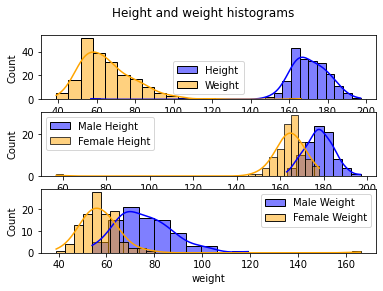

In [21]:
fig, ax = plt.subplots(nrows=3)
sns.histplot(df['height'], kde=True, color='blue', label='Height', ax = ax[0])
sns.histplot(df['weight'], kde=True, color='orange', label='Weight', ax = ax[0])
sns.histplot(df[df['sex'] == 'M']['height'], kde=True, color='blue', label='Male Height', ax = ax[1])
sns.histplot(df[df['sex'] == 'F']['height'], kde=True, color='orange', label='Female Height', ax = ax[1])
sns.histplot(df[df['sex'] == 'M']['weight'], kde=True, color='blue', label='Male Weight', ax = ax[2])
sns.histplot(df[df['sex'] == 'F']['weight'], kde=True, color='orange', label='Female Weight', ax = ax[2])
fig.suptitle('Height and weight histograms')
for axs in ax:
    axs.legend()

In [22]:
train.replace({'M':0, 'F':1}, inplace=True)
test.replace({'M':0, 'F':1}, inplace=True)

C:\Users\fenryux\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [23]:
train.head()

,sex,weight,height,repwt,repht
160,1,51,163,50.0,160.0
21,1,61,170,61.0,170.0
17,1,62,168,62.0,165.0
69,0,80,178,76.0,175.0
59,0,57,173,58.0,170.0


In [24]:
test.head()

,sex,weight,height,repwt,repht
129,1,44,157,44.0,155.0
118,0,75,169,76.0,165.0
119,0,65,178,66.0,178.0
120,0,78,178,77.0,175.0
135,1,53,162,53.0,160.0


In [25]:
X_train = train.loc[:, 'weight':'height'].to_numpy()
y_train = train['sex'].to_numpy()
clf = LogisticRegression().fit(X_train, y_train)
print('Score: ', clf.score(X_train, y_train))

Score:  0.9


In [26]:
X_test = test.loc[:, 'weight':'height'].to_numpy()
y_test = test['sex'].to_numpy()
predictions = clf.predict(X_test)
print('Accuracy_score: ', accuracy_score(predictions, y_test))

Accuracy_score:  0.92


C:\Users\fenryux\AppData\Local\Temp/ipykernel_13328/3351774255.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)
C:\Users\fenryux\AppData\Local\Temp/ipykernel_13328/3351774255.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)


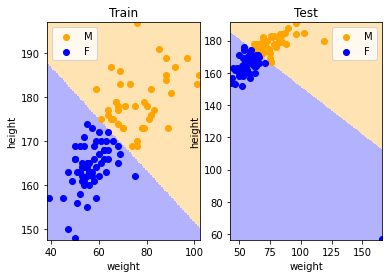

In [27]:
fig, ax = plt.subplots(ncols=2)

x_min, x_max = X_train[:, 0].min() - 0.5,  X_train[:, 0].max() + 0.5
y_min, y_max =  X_train[:, 1].min() - 0.5,  X_train[:, 1].max() + 0.5

h = 0.4
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax[0].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)

predictions = clf.predict(X_train)

ax[0].scatter(X_train[predictions == 0][:,0], X_train[predictions == 0][:,1], color='orange', label='M')
ax[0].scatter(X_train[predictions == 1][:,0], X_train[predictions == 1][:,1], color='blue', label='F')
ax[0].set_xlabel('weight')
ax[0].set_ylabel('height')
ax[0].set_title('Train')
ax[0].legend()

x_min, x_max = X_test[:, 0].min() - 0.5,  X_test[:, 0].max() + 0.5
y_min, y_max =  X_test[:, 1].min() - 0.5,  X_test[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
ax[1].pcolormesh(xx, yy, Z, cmap=ListedColormap(['orange','blue']), alpha=0.3)

predictions = clf.predict(X_test)
ax[1].scatter(X_test[predictions == 0][:,0], X_test[predictions == 0][:,1], color='orange', label='M')
ax[1].scatter(X_test[predictions == 1][:,0], X_test[predictions == 1][:,1], color='blue', label='F')
ax[1].set_xlabel('weight')
ax[1].set_ylabel('height')
ax[1].set_title('Test')
ax[1].legend()

# 2.2

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [29]:
df = pd.read_excel('Folds5x2_pp.xlsx', sheet_name='Sheet1')

In [30]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [31]:
validation, test = train_test_split(df, test_size=0.5)

In [32]:
X_validation = validation.loc[:, 'AT':'RH'].to_numpy()
y_validation = validation['PE'].to_numpy()

In [33]:
X_test = test.loc[:, 'AT':'RH'].to_numpy()
y_test = test['PE'].to_numpy()

In [34]:
clf = LinearRegression().fit(X_validation, y_validation)
print('Score: ', clf.score(X_validation, y_validation))

Score:  0.9303352857076057


In [35]:
predictions = clf.predict(X_validation)
print('R2 = ', r2_score(predictions, y_validation))
print('MSE = ', mean_squared_error(predictions, y_validation))

R2 =  0.9251187014373985
MSE =  20.254882959654314


Text(0, 0.5, 'Оценка')

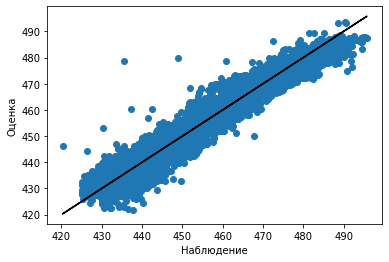

In [36]:
fig, ax = plt.subplots()
ax.scatter(y_validation, predictions)
ax.plot(y_validation,y_validation, color='black')
ax.set_xlabel('Наблюдение')
ax.set_ylabel('Оценка')